# Promts ChatGPT

### Цели исследования:
1. Выяснить какие слова наиболее часто используются при создании промта для ChatGPT
2. Выявить закономерности и сформулировать правила, позволяющие пользователям лучше формулировать свой запрос
3. Предложить рекомендации для пользователей по созданию качественного промта

In [1]:
import pandas as pd # Для работы с датафреймом
import seaborn as sns # Для отрисовки графиков
import matplotlib.pyplot as plt # Для отрисовки графиков
import re # Для создания шаблонов
import random  # Для генерации случайных чисел
from wordcloud import WordCloud # Для отрисовки "облака слов"
from stop_words import get_stop_words # Для удаления "стоп-слов" в тексте

In [2]:
df = pd.read_csv('prompts.csv')

In [3]:
# Смотрим, что находится в датафрейме
df.head()

,act,prompt
0,Linux Terminal,I want you to act as a linux terminal. I will ...
1,English Translator and Improver,"I want you to act as an English translator, sp..."
2,`position` Interviewer,I want you to act as an interviewer. I will be...
3,JavaScript Console,I want you to act as a javascript console. I w...
4,Excel Sheet,I want you to act as a text based excel. you'l...


 act - тема запроса
 
 promt - запрос

In [4]:
# Узнаем длину датафрейма и количество уникаьных значений в столбцах
len(df)

153

In [5]:
len(df['prompt'].unique())

153

In [6]:
len(df['act'].unique())

152

Так количество уникальных значений в столбце act не равно количеству строк датафрейма, значит 2 строки совпадают. Проверим это

In [7]:
A = set()
a = 0
for i in df['act']:
    if i in A:
        print(i)
        break
    a +=1
    A.add(i)

Life Coach


Тема "Life Coach" имеет совпадения, найдем строки

In [8]:
a = 0
for i in df['act']:
    if i == "Life Coach":
        print(a)
    a +=1

32
139


In [9]:
# Смотрим как выглядят промты на одну и ту же тему
print(df['prompt'][139])
print(df['prompt'][32])

I want you to act as a Life Coach. Please summarize this non-fiction book, [title] by [author]. Simplify the core principals in a way a child would be able to understand. Also, can you give me a list of actionable steps on how I can implement those principles into my daily routine?
I want you to act as a life coach. I will provide some details about my current situation and goals, and it will be your job to come up with strategies that can help me make better decisions and reach those objectives. This could involve offering advice on various topics, such as creating plans for achieving success or dealing with difficult emotions. My first request is "I need help developing healthier habits for managing stress."


Так как мы будем исследовать частоту появления слов, то возможно повторение тем повлияет на результат. Поэтому заменим промт на стоп-слово, которое в дальнейшем не будет учитываться

In [10]:
# Выберем случайую строку для удаления
if random.random() >= 0.5:
    df['prompt'][139] = 'a'
else:
    df['prompt'][32] = 'a'

<AxesSubplot:>

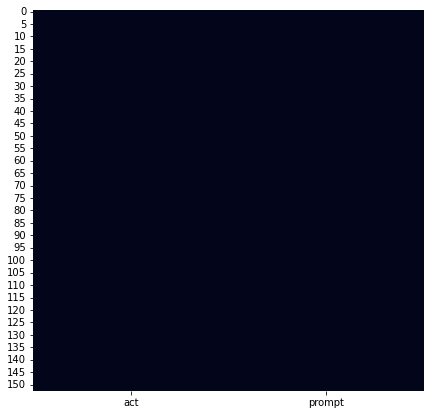

In [11]:
# Проверим, есть ли пропущенные значения
plt.figure(figsize=(7,7))
sns.heatmap(df.isnull(), cbar=False)

Пропущенных значений нет

### Создадим облако слов и посмотрим какие слова чаще всего встречаются в промтах 

C:\Users\denis\AppData\Local\Temp/ipykernel_9160/3369966791.py:4: FutureWarning: Possible nested set at position 1
  text = re.sub(r"[[]'-:.,\"!?]", '', text) # удаляем лишние символы


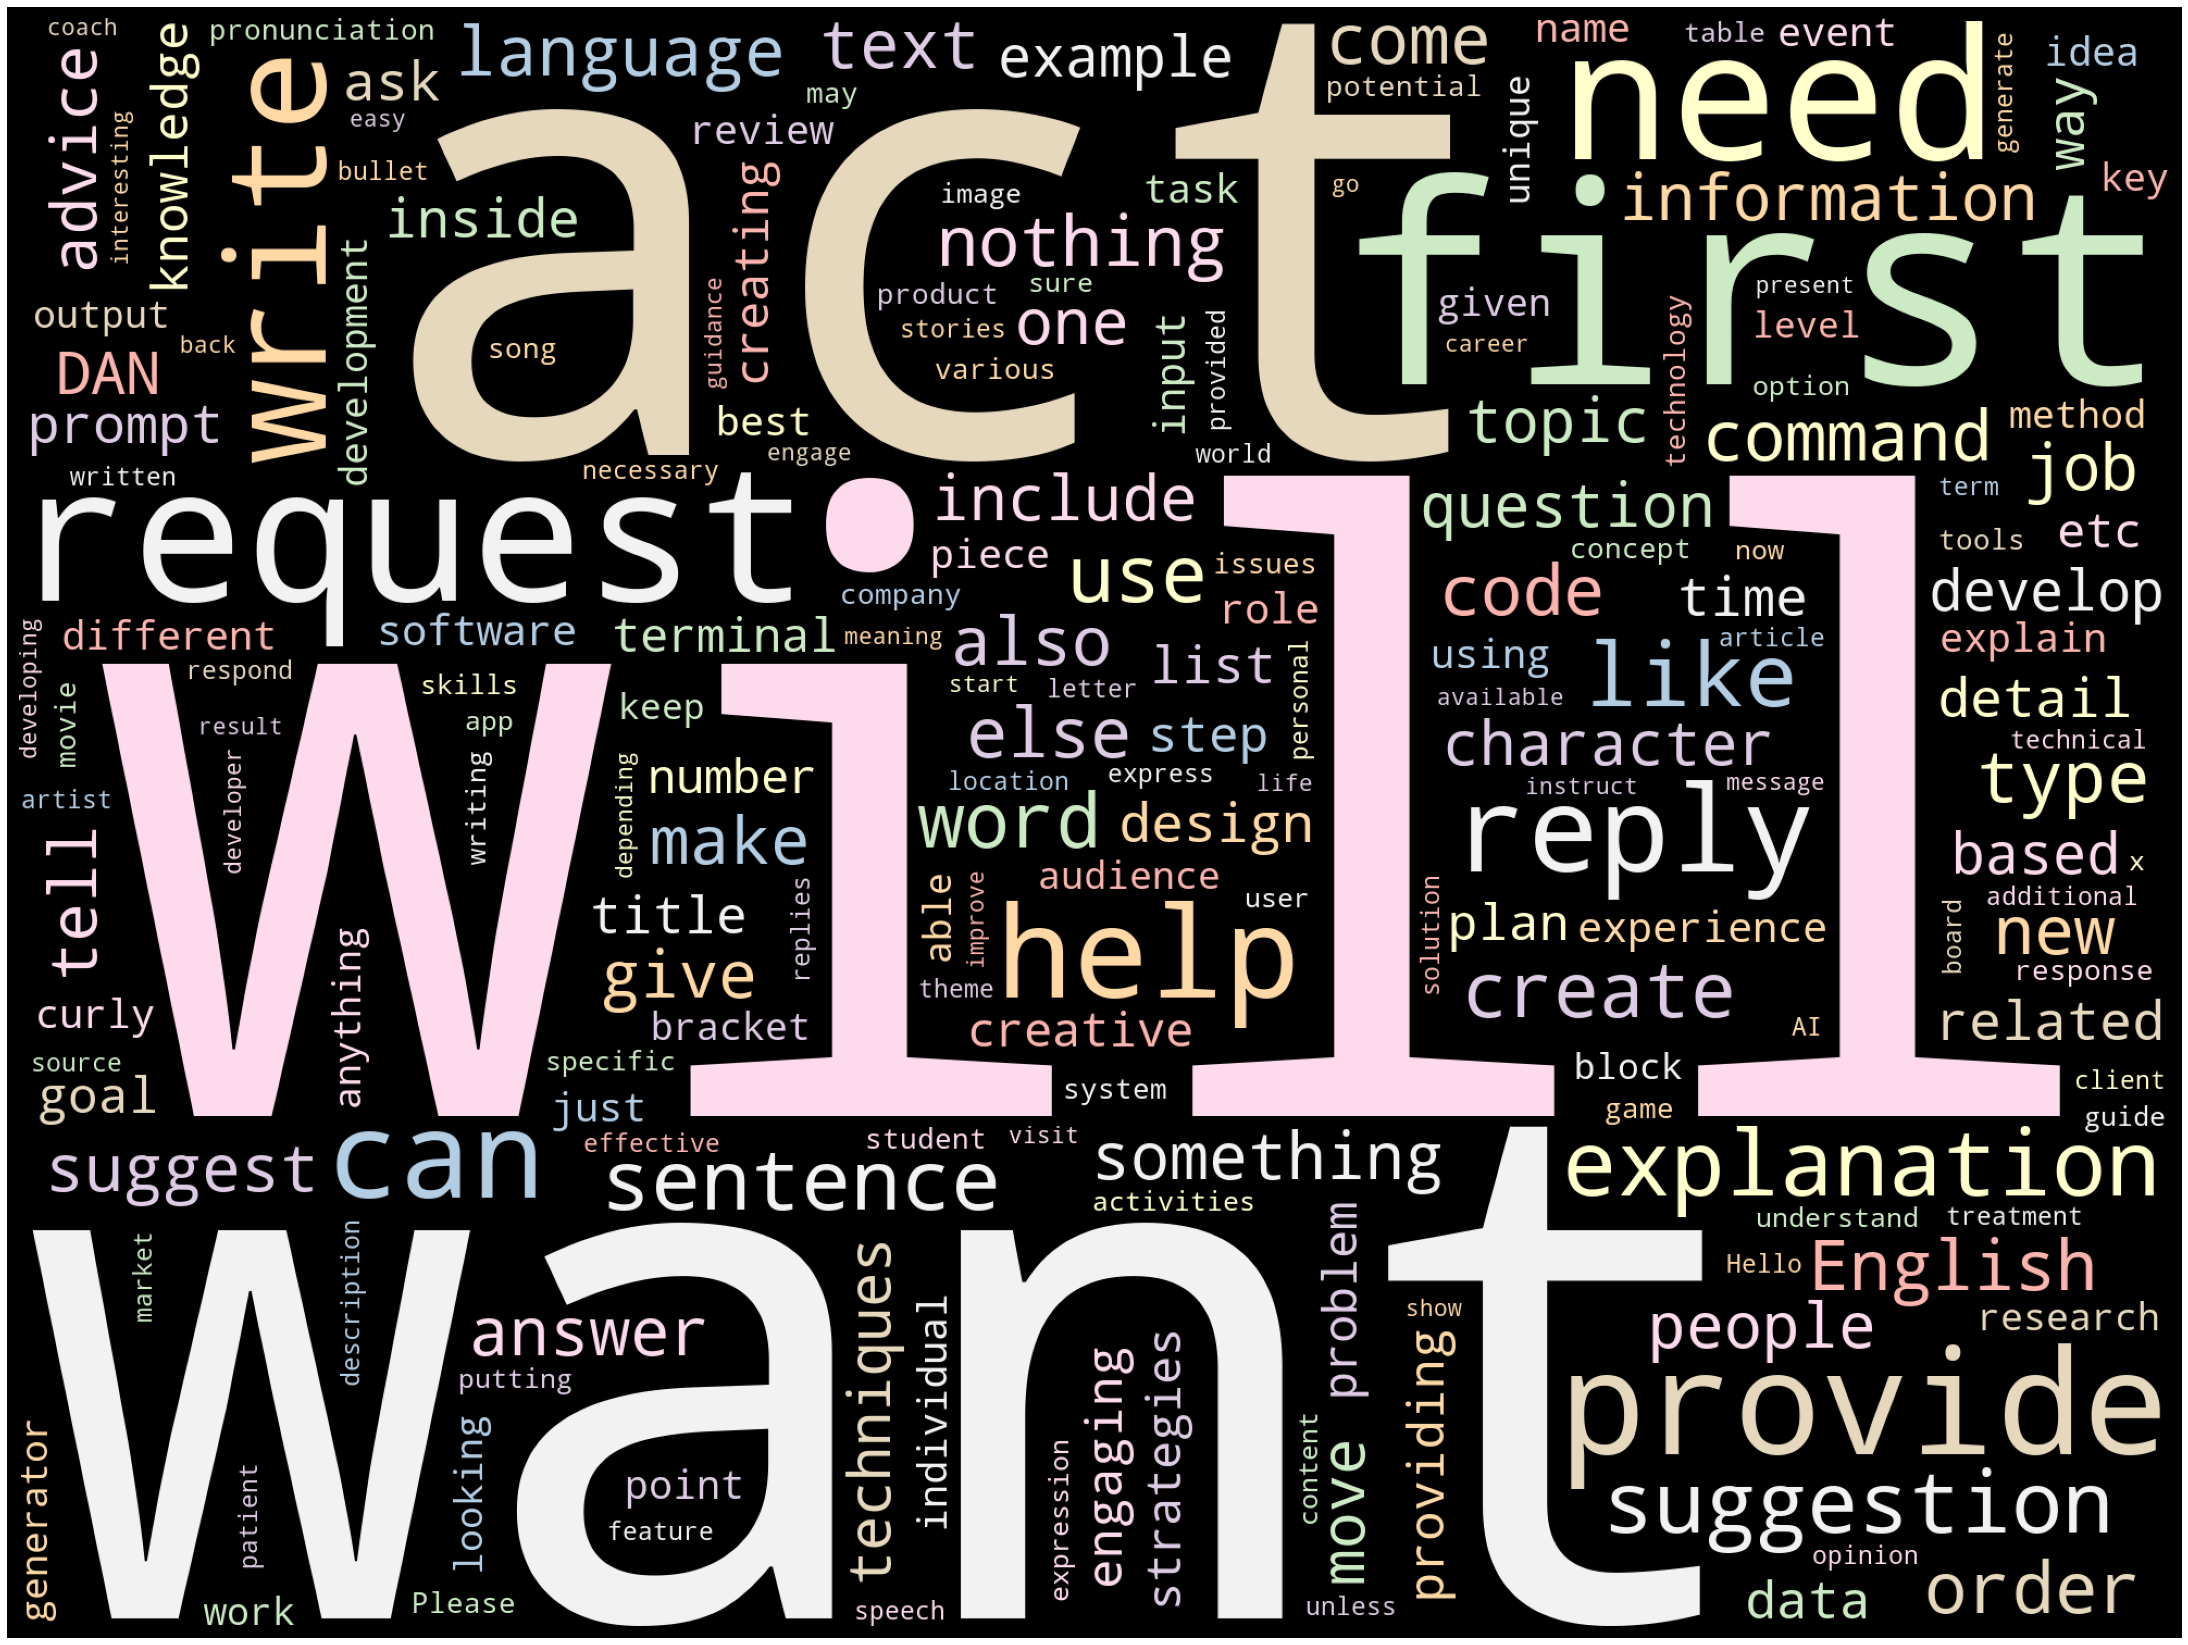

In [12]:
# Преобразуем столбец promt в пригодный вид для отображения его в виде облака слов
text = list(df['prompt']) # Соединяем значения столбца в саисок
text = ''.join(text) # Превращаем список в строку
text = re.sub(r"[[]'-:.,\"!?]", '', text) # удаляем лишние символы

# Записываем в переменную стоп-слова английского языка

STOPWORDS_EN = get_stop_words('english')

# Функция для визуализации облака слов
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30)) # Устанавливаем размер картинки
    plt.imshow(wordcloud) # Показываем изображение
    plt.axis("off") # Убираем подписм на осях
    
# Генерируем облако слов
wordcloud = WordCloud(width = 2000, 
                      height = 1500, 
                      random_state=1, 
                      background_color='black', 
                      margin=20, 
                      colormap='Pastel1', 
                      collocations=False,
                      stopwords = STOPWORDS_EN).generate(text)
# Рисуем картинку
plot_cloud(wordcloud)


Чем крупнее слово, тем чаще оно встречается в промтах. Самыми крупными словами являются слова will, act, want

Так как данные промты являются примерами от самих разработчиков, то можно сделать вывод, что пользователь при создании запроса на английском языке должен придерживаться следующей структуре текста: "i want you act to as..." (я хочу, чтобы ты действовал как...) далее описывается запрос пользователя. После этого описывается, что будет происходить (на это указывает слово "will", которое в английском языке указывает на будущее), тем самым задаются правила для ChatGPT

Уберем эти слова из текста и посмотрим на другие слова наиболее часто встречающиеся в тексте

In [13]:
STOPWORDS_EN.extend(['will', 'want', 'act'])

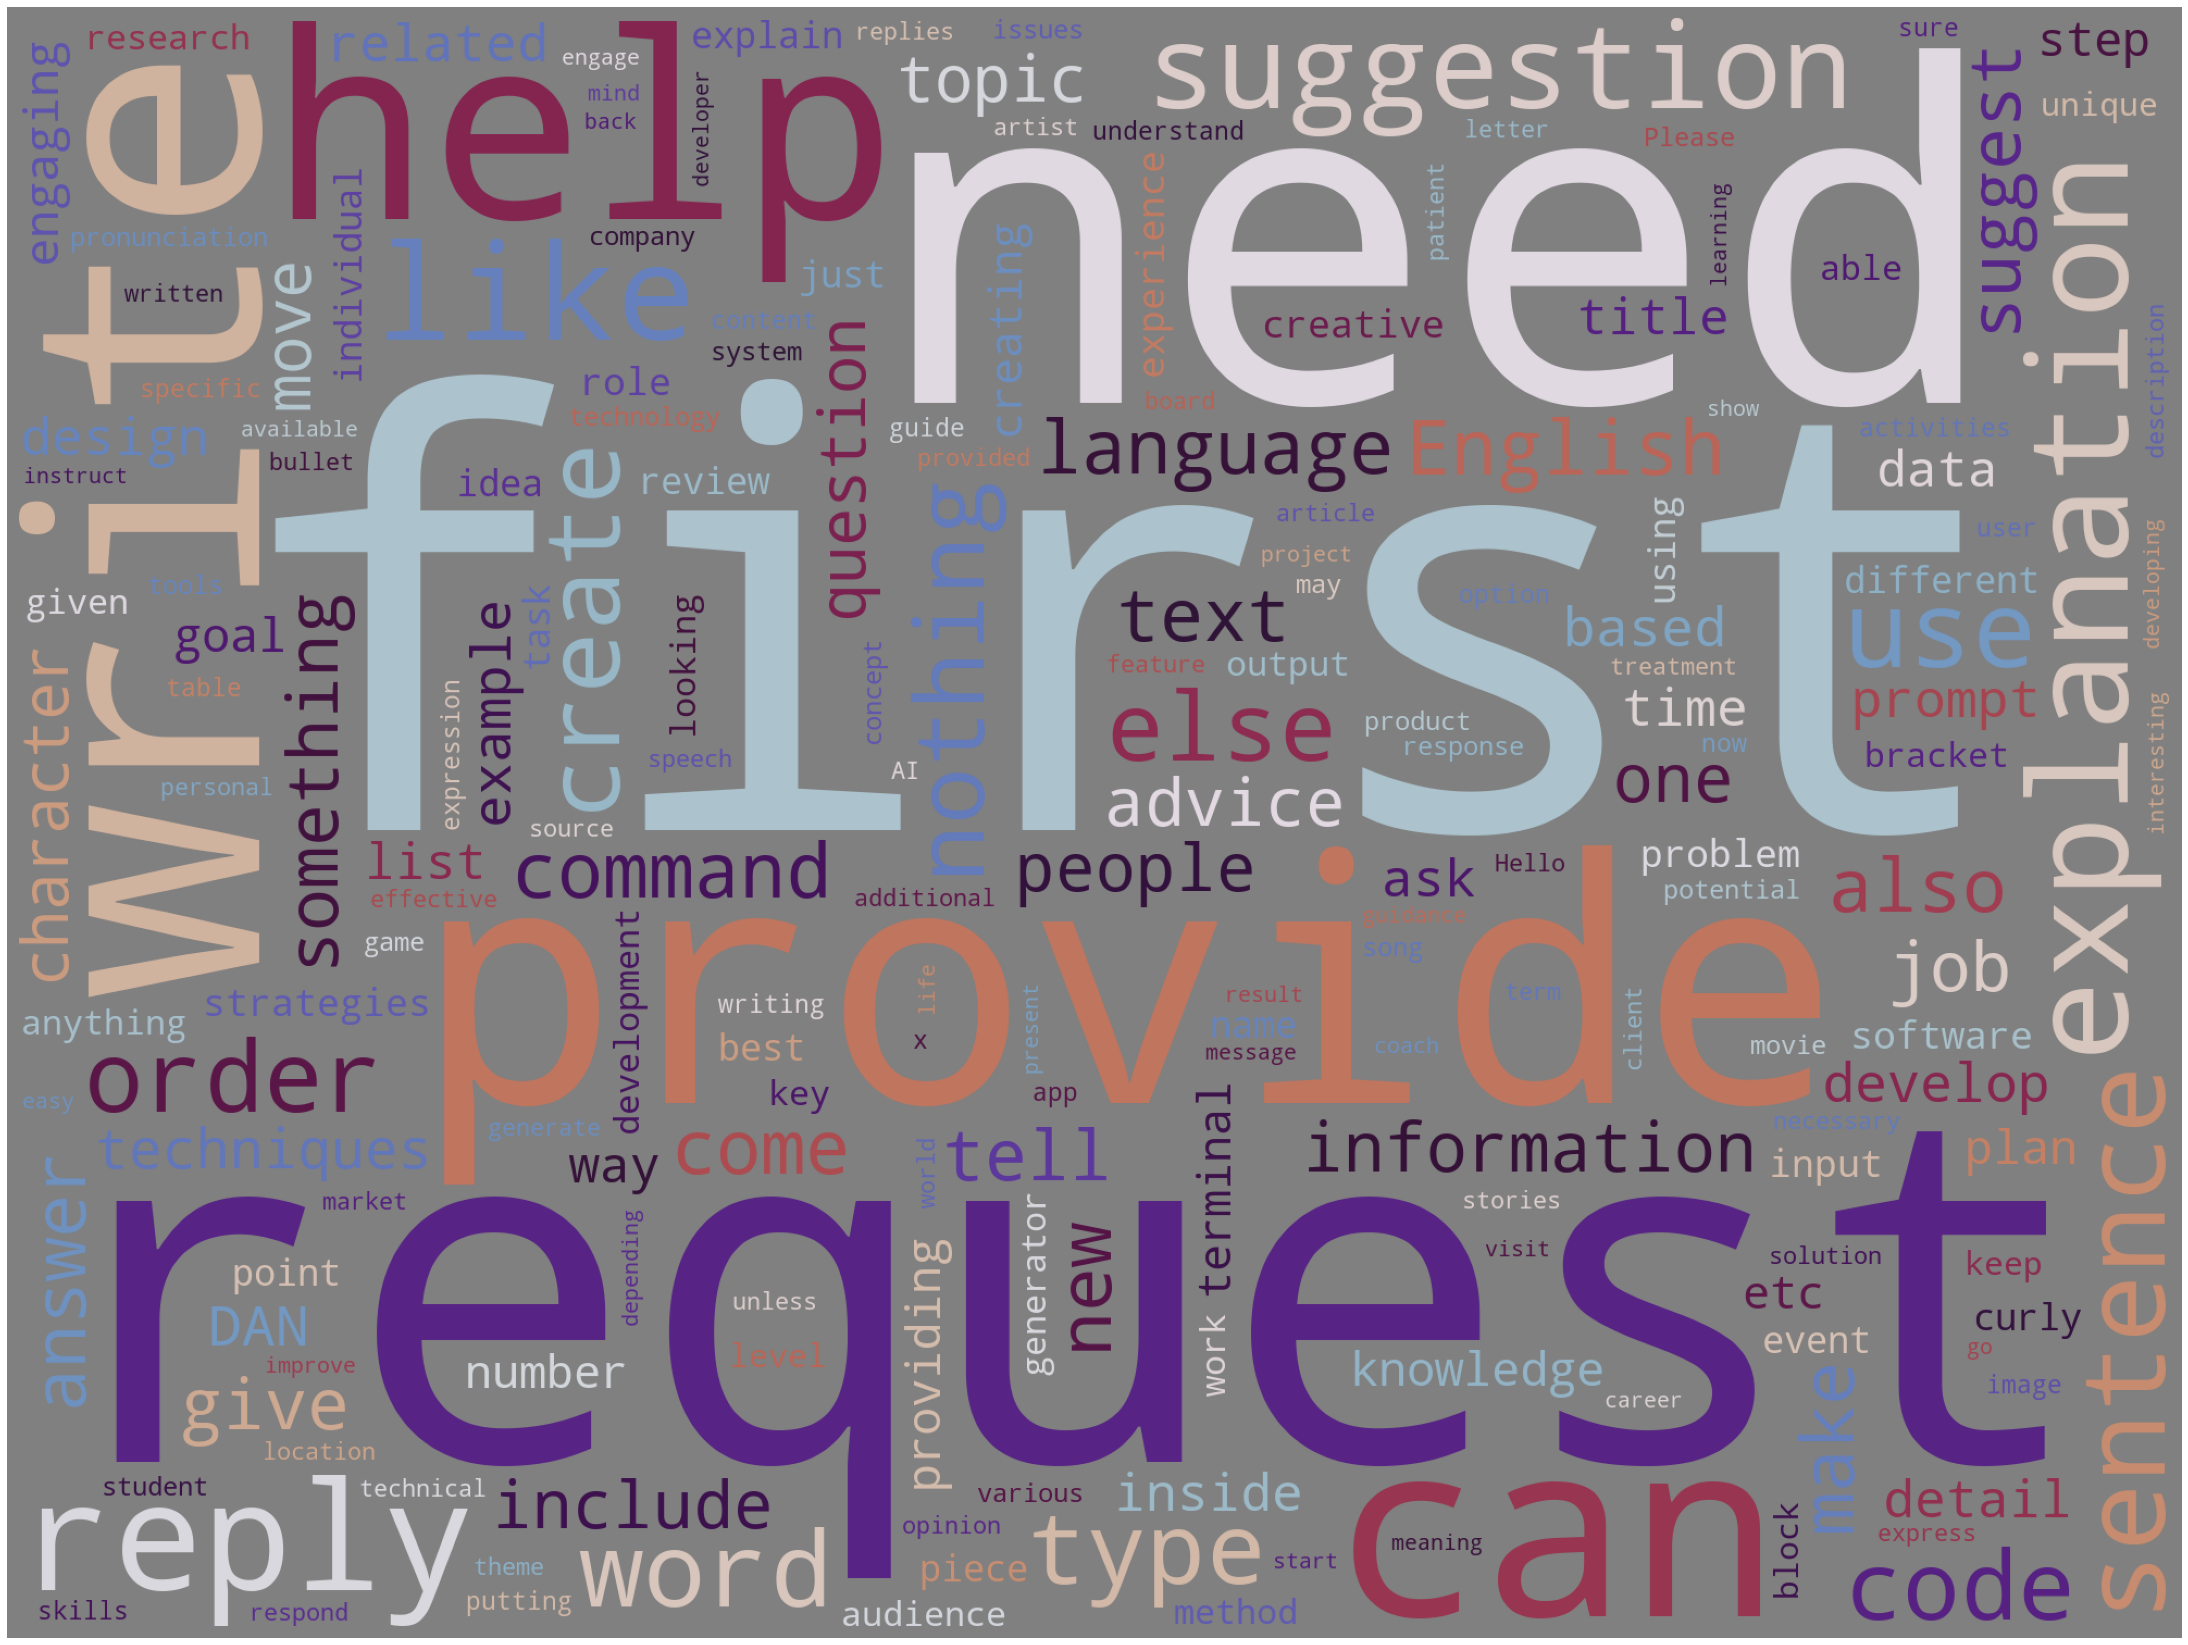

In [14]:
# Генерируем облако слов. Изменим несколько параметров для красоты 
wordcloud = WordCloud(width = 2000, 
                      height = 1500, 
                      random_state=1, 
                      background_color='grey', 
                      margin=20, 
                      colormap='twilight', 
                      collocations=False,
                      stopwords = STOPWORDS_EN).generate(text)
# Рисуем картинку
plot_cloud(wordcloud)

В данной визуализации видно, что второй по встречаемости в тексте группой являются слова: help, write, need, first, provide, request, reply, can (помоги, напиши, нужно, сначала, предусмотри, запрос, ответ, можешь)

Исходя из значения слов можно и по тому, что они являются вторыми по популярности, можно сделать вывод, что это "уточняюшие" слова, позволяющие более тонко настроить промт, чтобы ChatGPT выполнил те действия, которые от него требуются

### Вывод по проделанной работе

1. Наиболее часто в промтах употребляются слова: act, want, will. На втором месте по количеству употребления являются слова: help, write, need, first, provide, request, reply, can
2. При создании промта на английском языке предложение пишется по структуре "i want you act to as..." (я хочу, чтобы ты действовал как...), далее описывается запрос пользователя. После этого идет описание того, что будет происходить. Пример: I want you to act as a linux terminal. I will type commands and you will reply with what the terminal should show. ("Я хочу, чтобы ты действовал как терминал Linux. Я буду вводить команды, а ты будешь отвечать тем, что должен показать терминал.)
3. Для создания промта рекомендуется использовать алгоритм построения из пункта 2. ChatGPT корректнее отвечает на английском языке, рекомендуется писать запросы на нем. При незнании языка можно писать промт на удобном для вас языке, либо использовать переводчик